# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt

# Functions

In [3]:
def graph_bar(kind, dataframe, column, title, legend, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
        
    elif kind == 'stacked':
         dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, stacked = True, 
                                    figsize = (15,10))

In [4]:
def sort_data(dataframe, column):
    
    return pd.DataFrame(dataframe[column].sort_values())

In [5]:
def clean_data():
    
    global db1
    db1 = db1[(db1.num_infections > 0)].reset_index()
    db1 = db1.drop(columns = ['index'], axis = 1)
    
    db1['date'] = pd.to_datetime(db1.date)
    
   
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Valenciana' if x == 'Valenciana, Comunidad' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad de Madrid' if x == 'Madrid, Comunidad de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Región de de Murcia' if x == 'Murcia, Región de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Foral de Navarra' if x == 'Navarra, Comunidad Foral de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Principado de Asturias' if x == 'Asturias, Principado de' else x)
    
    
    db1['province'] = db1.province.apply(lambda x: 'Alicante' if x == 'Alicante/Alacant' else x)
    db1['province'] = db1.province.apply(lambda x: 'Castellón' if x == 'Castellón/Castelló' else x)
    db1['province'] = db1.province.apply(lambda x: 'Araba' if x == 'Araba/Álava' else x)
    
    db1['sex'] = db1.sex.apply(lambda x: 'UKNOWN' if x == 'NC' else x)
    
    db1['age_interval'] = db1.age_interval.apply(lambda x: 'UKNOWN' if x == 'NC' else x)

In [6]:
def cumulative(dataframe):
    
    cumu_num_infections = dataframe.num_infections.cumsum()
    cumu_num_hosp = dataframe.num_hosp.cumsum()
    cumu_num_uci = dataframe.num_uci.cumsum()
    cumu_num_dead = dataframe.num_dead.cumsum()

    cumulative = pd.DataFrame({'cumu_num_infections': cumu_num_infections, 'cumu_num_hosp': cumu_num_hosp, 
                               'cumu_num_uci': cumu_num_uci, 'cumu_num_dead': cumu_num_dead})
    dataframe = pd.concat([dataframe, cumulative], axis = 1)
    return dataframe

In [7]:
def overview(dataframe, title):
    
    if title == 'evolution':
        plt.rcParams['figure.figsize']=(15, 15)
        fig, axs = plt.subplots(4)
        fig.suptitle('Pandemic evolution')
        axs[0].plot(dataframe.date, dataframe.num_infections)
        axs[0].set_title('Number of infections')
        axs[1].plot(dataframe.date, dataframe.num_hosp)
        axs[1].set_title('Number of hospitalisations')
        axs[2].plot(dataframe.date, dataframe.num_uci)
        axs[2].set_title('Number of Intensive Care Unit')
        axs[3].plot(dataframe.date, dataframe.num_dead)
        axs[3].set_title('Number of deaths')
    
    if title == 'Number of infections':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_infections)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.cumu_num_infections)
        axs[1].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of hospitalisations':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_hosp)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.cumu_num_hosp)
        axs[1].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
    
    elif title == 'Number of Intensive Care Units':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_uci)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.cumu_num_uci)
        axs[1].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of deaths':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_dead)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.cumu_num_dead)
        axs[1].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);

In [8]:
def graph_bar(kind, dataframe, column, title, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();

In [9]:
def freq_rel(dataframe):
    
    dataframe['Number of infection (%)'] = [round(i/ dataframe['num_infections'].sum(),3)*100 for i in dataframe['num_infections']]
    dataframe['Number of hospitalisation (%)'] = [round(i/ dataframe['num_hosp'].sum(),3)*100 for i in dataframe['num_hosp']]
    dataframe['Number of Intensive Care Unit (%)'] = [round(i/ dataframe['num_uci'].sum(),3)*100 for i in dataframe['num_uci']]
    dataframe['Number of deaths (%)'] = [round(i/ dataframe['num_dead'].sum(),3)*100 for i in dataframe['num_dead']]

In [10]:
def organise(column):
    
    name = db1.groupby(column).sum()
    freq_rel(name)
    
    return name

In [11]:
def severe_cases(dataframe):
    
     dataframe[['Number of hospitalisation (%)', 'Number of Intensive Care Unit (%)',
                    'Number of deaths (%)']].plot.bar(title = 'Severe Cases', grid = 1, 
                    yticks = [i for i in range(0,100,10)], 
                    rot=0, fontsize = 13, color = ['Darkblue', 'Orange', 'Darkred'], stacked = True, figsize = (15,10))

## Source - Data Market:
https://datamarket.es/#covid-19-dataset

We'll first explore the different data sets one can find in different sources regarding the covid information for Spain

In [12]:
db1 =pd.read_csv('../covid-19-sample.csv') 

In [13]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819000 entries, 0 to 818999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               819000 non-null  object
 1   autonomous_region  819000 non-null  object
 2   province           819000 non-null  object
 3   sex                819000 non-null  object
 4   age_interval       819000 non-null  object
 5   num_infections     819000 non-null  int64 
 6   num_hosp           819000 non-null  int64 
 7   num_uci            819000 non-null  int64 
 8   num_dead           819000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 56.2+ MB


## Data description

+ age_interval: Intervalo de años en el cual se ubica el grupo de análisis.
+ autonomous_region: Comunidad autónoma donde se registran los datos.
+ date: Fecha del momento en el cual se obtuvieron los datos.
+ num_dead: Número de muertes que se han producido en el grupo de análisis.
+ num_hosp: Número de hospitalizaciones que ha tenido el grupo de análisis.
+ num_infections: Número de infecciones que han se han reportado en el grupo de análisis.
+ num_uci: Número de ingresos en la Unidad de Cuidados Intensivos que ha tenido el grupo de análisis.
+ province: Provincia donde se registran los datos.
+ sex: Sexo del grupo de análisis (H, M, NC).


#### Data cleaning

In [14]:
clean_data()

In [15]:
db1.head()

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-03-02,Comunidad Valenciana,Alicante,H,60-69,1,1,0,0
1,2020-03-02,Comunidad Valenciana,Alicante,H,70-79,1,1,0,0
2,2020-03-02,Comunidad Valenciana,Alicante,M,30-39,1,0,0,0
3,2020-03-02,Comunidad Valenciana,Alicante,M,70-79,1,0,0,0
4,2020-03-02,Comunidad Valenciana,Alicante,M,80+,1,0,0,0


### autonomous_region:

In [16]:
db1.autonomous_region.unique()

array(['Comunidad Valenciana', 'Castilla-La Mancha', 'Andalucía',
       'Castilla y León', 'Catalunya', 'Extremadura', 'País Vasco',
       'Galicia', 'Ceuta', 'Canarias', 'Aragón', 'La Rioja',
       'Comunidad de Madrid', 'Melilla', 'Región de de Murcia',
       'Comunidad Foral de Navarra', 'Principado de Asturias',
       'Illes Balears', 'Cantabria'], dtype=object)

In [17]:
region = organise('autonomous_region')

In [18]:
region

,num_infections,num_hosp,num_uci,num_dead,Number of infection (%),Number of hospitalisation (%),Number of Intensive Care Unit (%),Number of deaths (%)
autonomous_region,,,,,,,,
Andalucía,591896,46152,5177,9276,16.0,13.1,15.6,12.3
Aragón,123897,12328,1175,3200,3.3,3.5,3.5,4.2
Canarias,56215,4873,1077,620,1.5,1.4,3.2,0.8
Cantabria,30549,3202,458,514,0.8,0.9,1.4,0.7
Castilla y León,225670,25507,2101,5884,6.1,7.2,6.3,7.8
Castilla-La Mancha,194224,18305,1359,5379,5.2,5.2,4.1,7.1
Catalunya,623260,40608,3463,14301,16.8,11.5,10.4,18.9
Ceuta,5946,286,33,60,0.2,0.1,0.1,0.1
Comunidad Foral de Navarra,62987,5744,555,1099,1.7,1.6,1.7,1.5


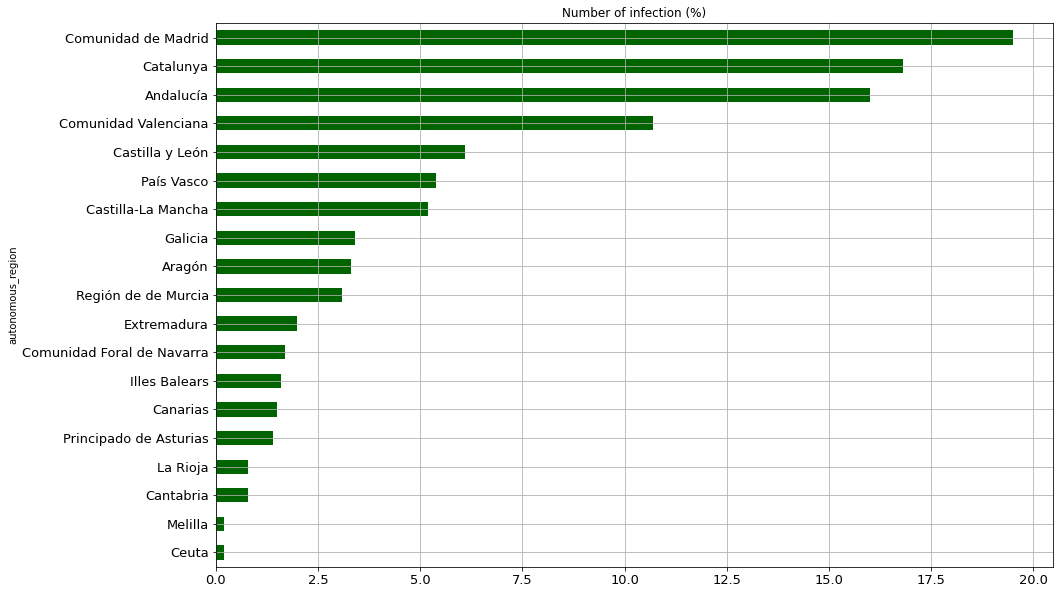

In [19]:
graph_bar('vertical', sort_data(region, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

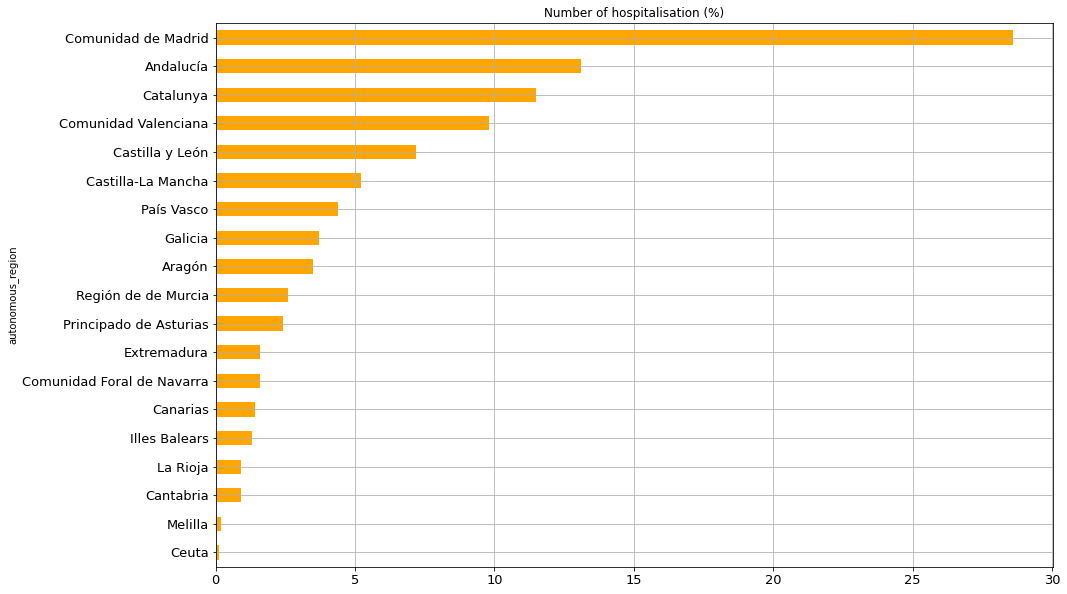

In [20]:
graph_bar('vertical', sort_data(region, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

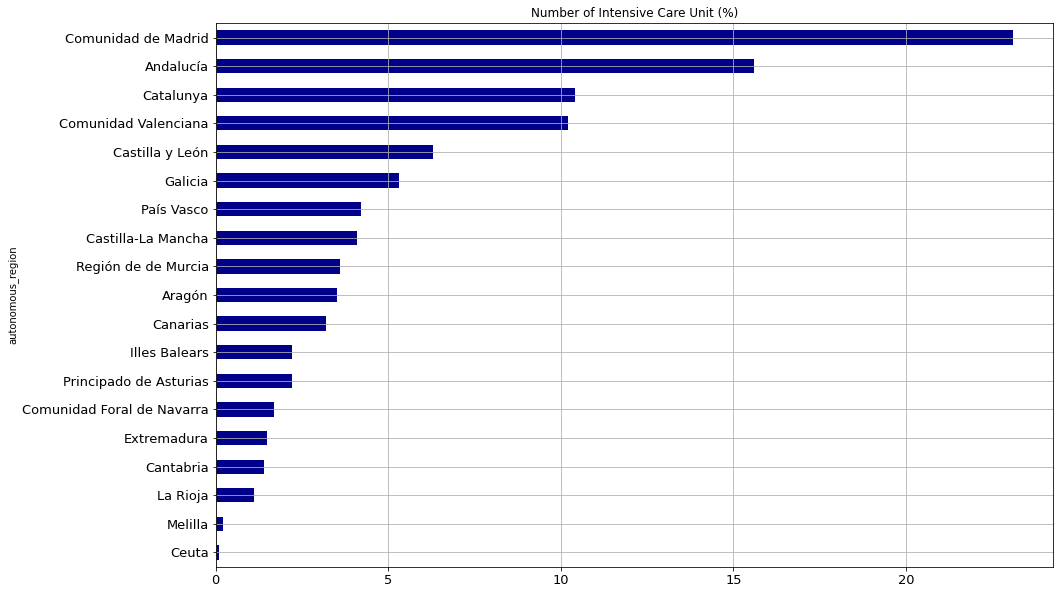

In [21]:
graph_bar('vertical', sort_data(region, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

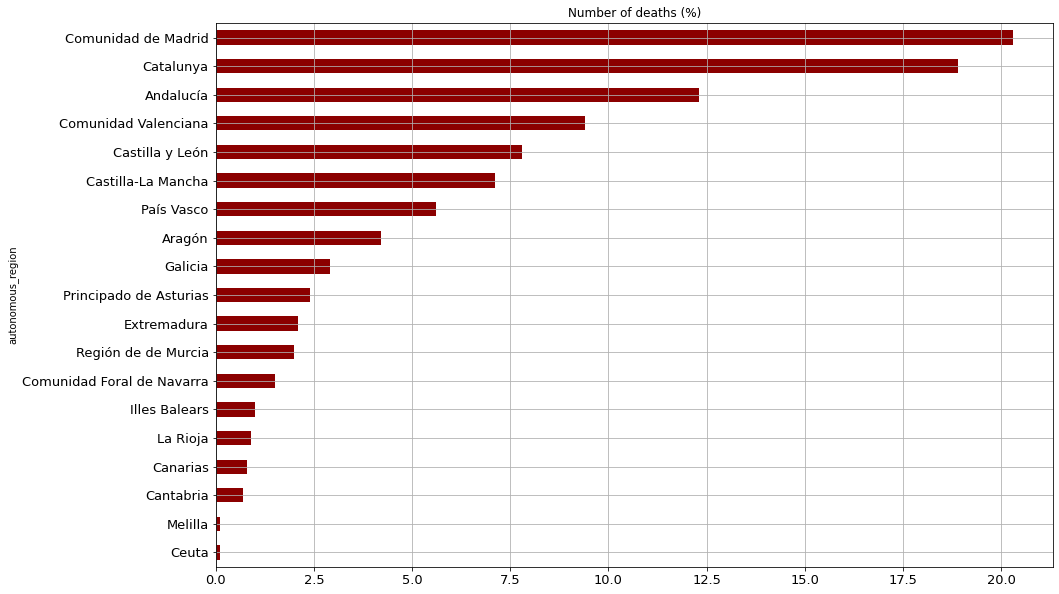

In [22]:
graph_bar('vertical', sort_data(region, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

## province:

In [23]:
db1.province.unique()

array(['Alicante', 'Albacete', 'Almería', 'Ávila', 'Barcelona', 'Badajoz',
       'Bizkaia', 'Burgos', 'A Coruña', 'Cádiz', 'Cáceres', 'Ceuta',
       'Córdoba', 'Ciudad Real', 'Castellón', 'Cuenca', 'Las Palmas',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén',
       'Lleida', 'León', 'La Rioja', 'Lugo', 'Madrid', 'Málaga',
       'Melilla', 'Murcia', 'Navarra', 'Asturias', 'Ourense', 'Palencia',
       'Illes Balears', 'Pontevedra', 'Cantabria', 'Salamanca', 'Sevilla',
       'Segovia', 'Soria', 'Gipuzkoa', 'Tarragona', 'Teruel',
       'Santa Cruz de Tenerife', 'Toledo', 'Valencia/València',
       'Valladolid', 'Araba', 'Zaragoza', 'Zamora'], dtype=object)

In [24]:
province = organise('province')

### Number of infection

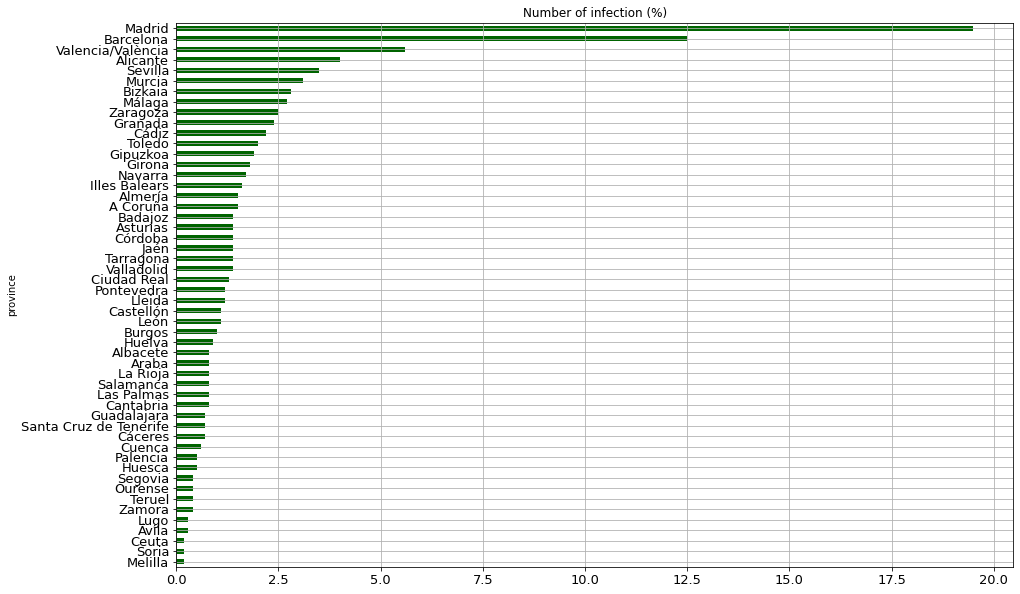

In [25]:
graph_bar('vertical', sort_data(province, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

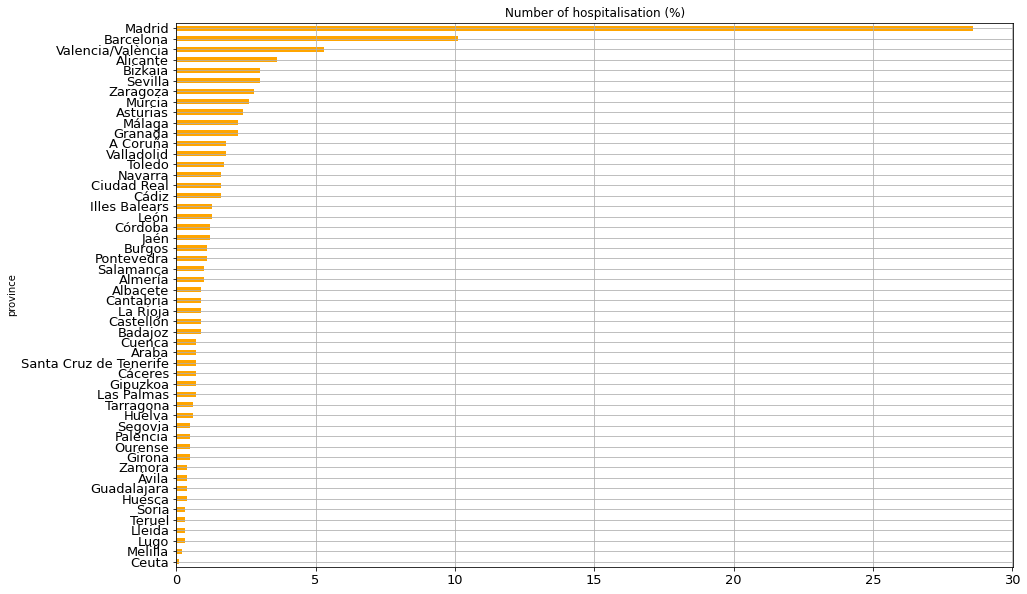

In [26]:
graph_bar('vertical', sort_data(province, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

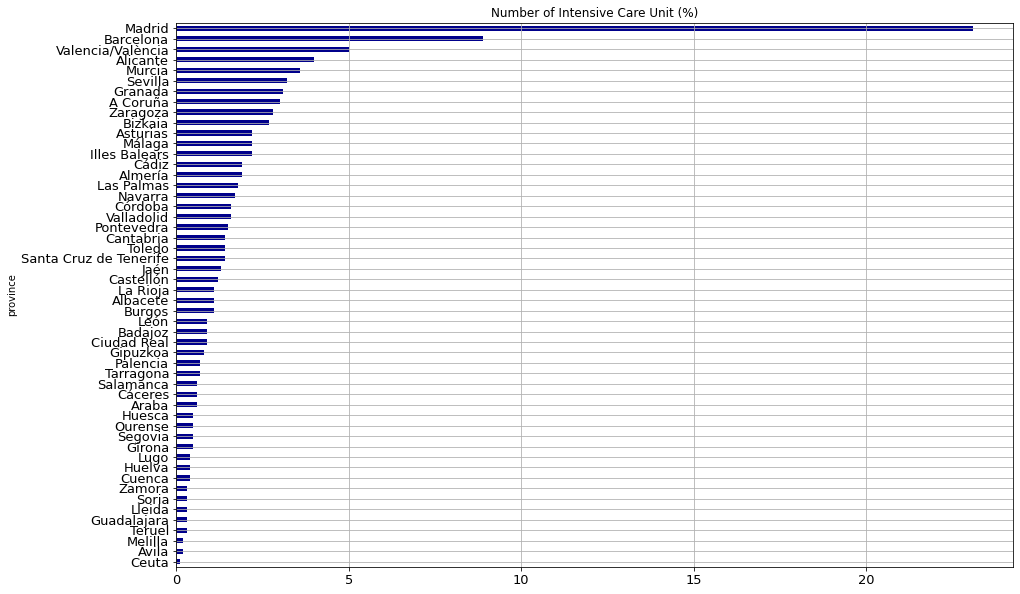

In [27]:
graph_bar('vertical', sort_data(province, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

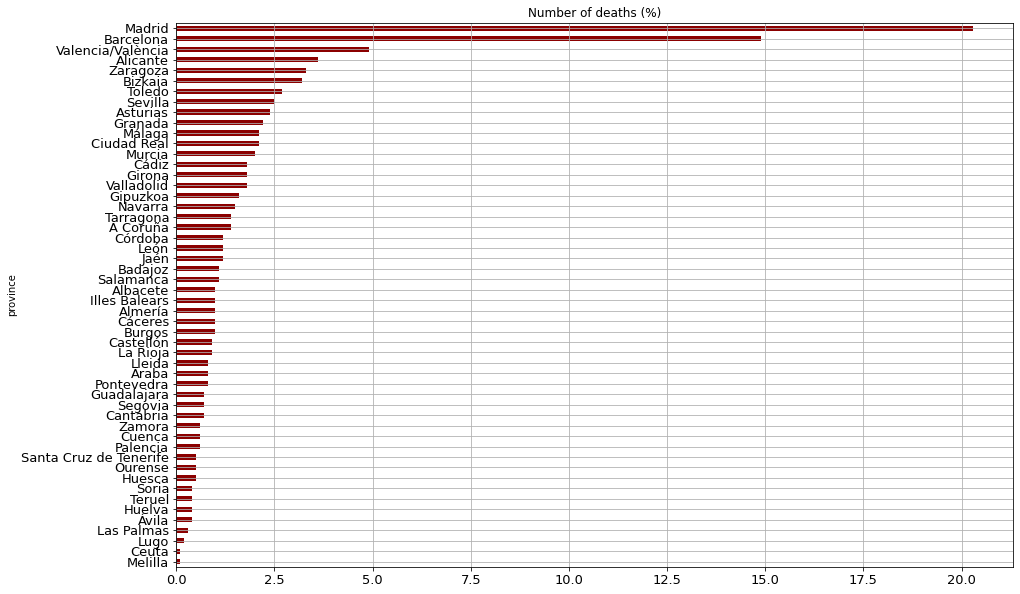

In [28]:
graph_bar('vertical', sort_data(province, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

## Pandemic Evolution

In [29]:
bydate = db1.groupby('date').sum().reset_index()

In [30]:
bydate = cumulative(bydate)

In [31]:
bydate.head()

,date,num_infections,num_hosp,num_uci,num_dead,cumu_num_infections,cumu_num_hosp,cumu_num_uci,cumu_num_dead
0,2020-01-18,1,1,0,0,1,1,0,0
1,2020-01-31,1,0,0,0,2,1,0,0
2,2020-02-09,1,1,0,0,3,2,0,0
3,2020-02-12,3,0,0,0,6,2,0,0
4,2020-02-21,1,0,0,0,7,2,0,0


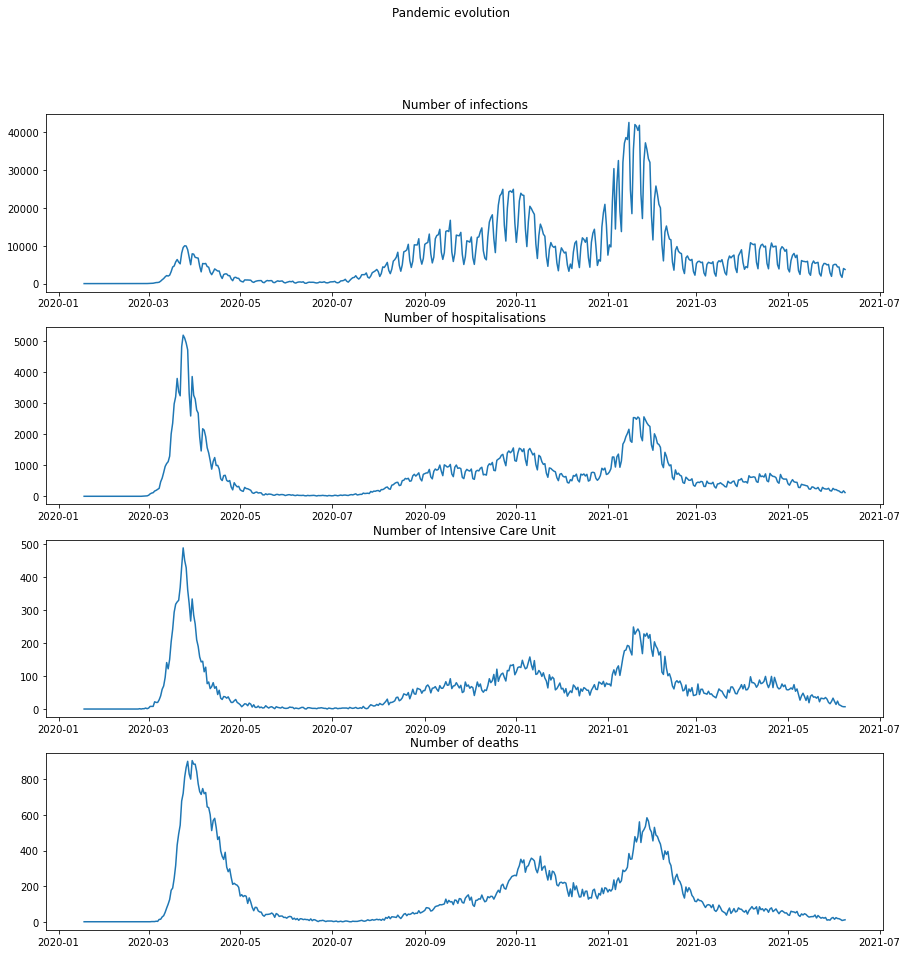

In [32]:
overview(bydate, 'evolution')

### Number of infections

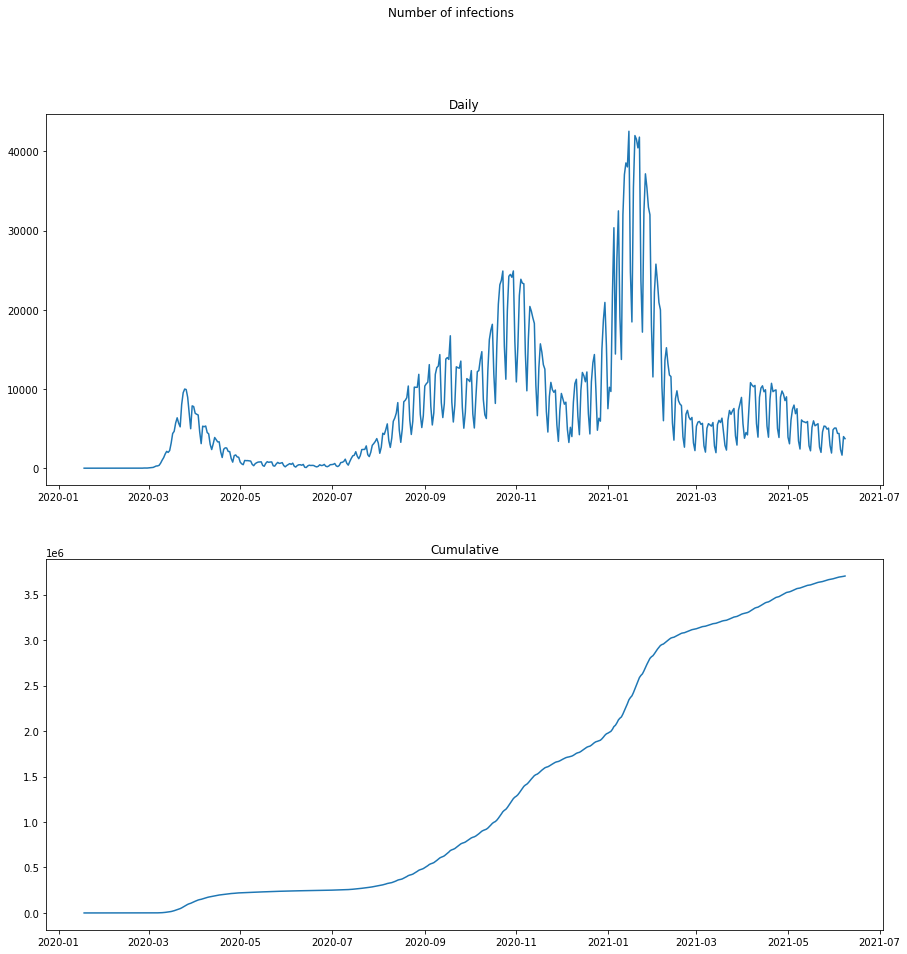

In [33]:
overview(bydate, 'Number of infections')

### Number of hospitalisations

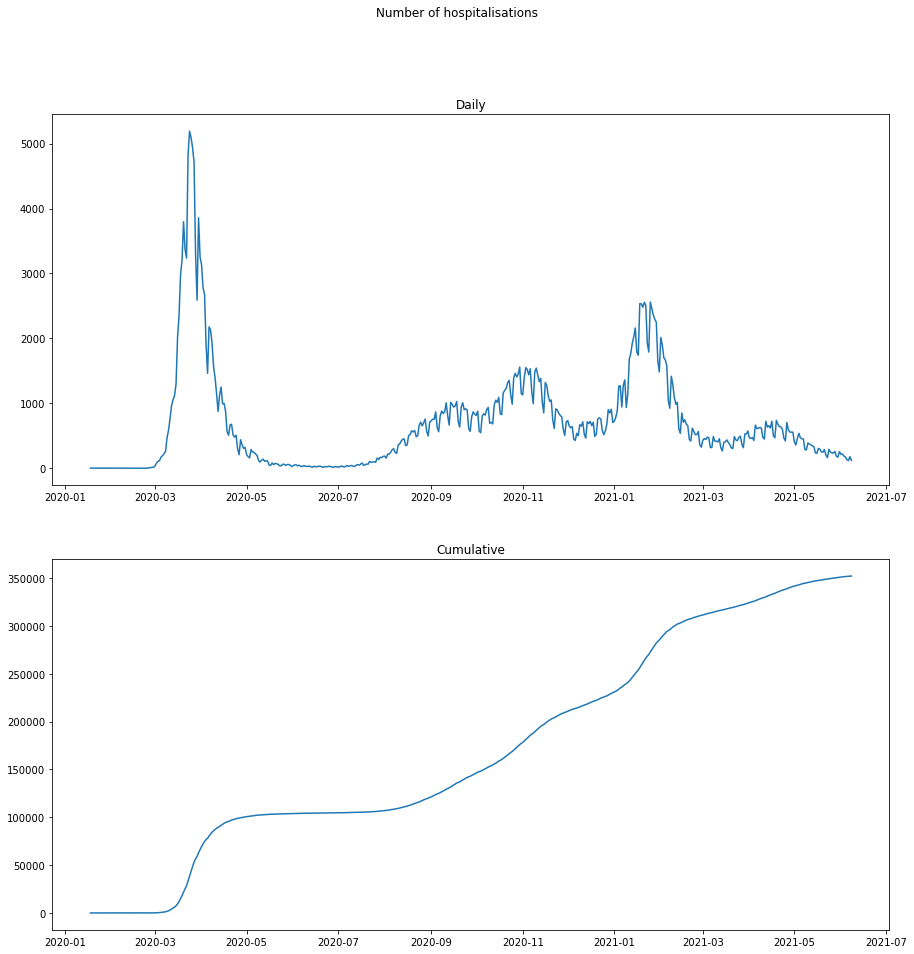

In [34]:
overview(bydate, 'Number of hospitalisations')

### Intensive Care Units

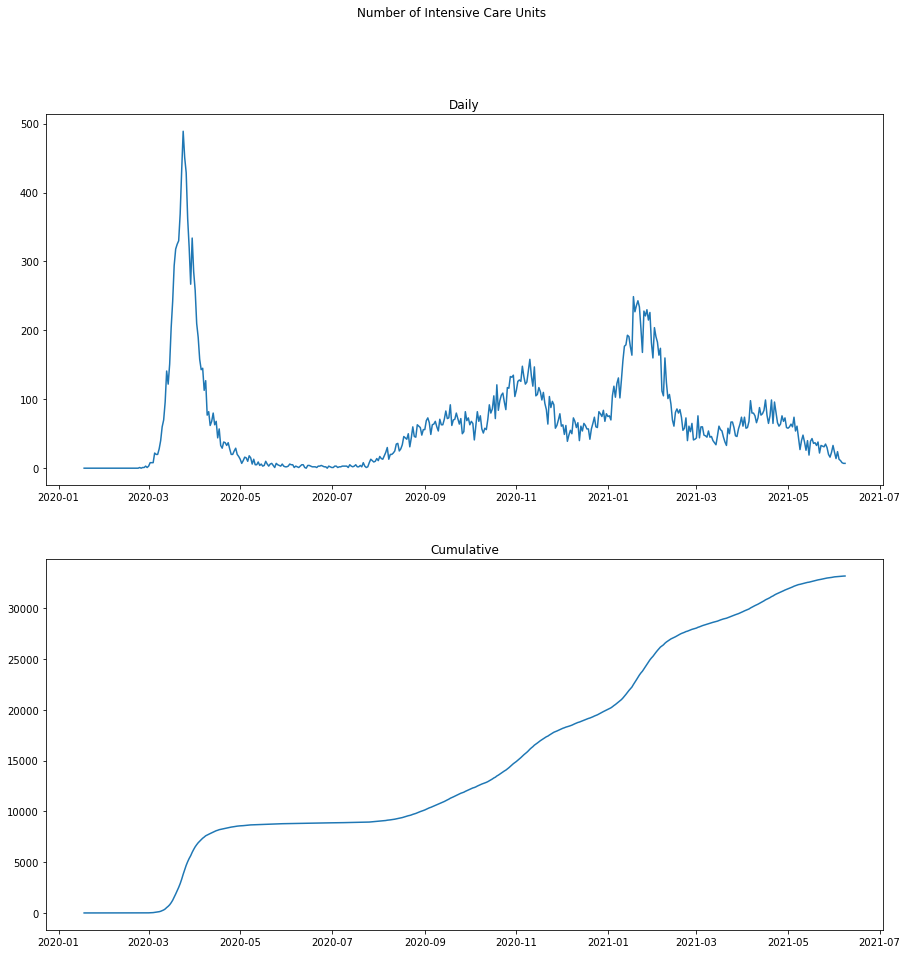

In [35]:
overview(bydate, 'Number of Intensive Care Units')

### Deaths

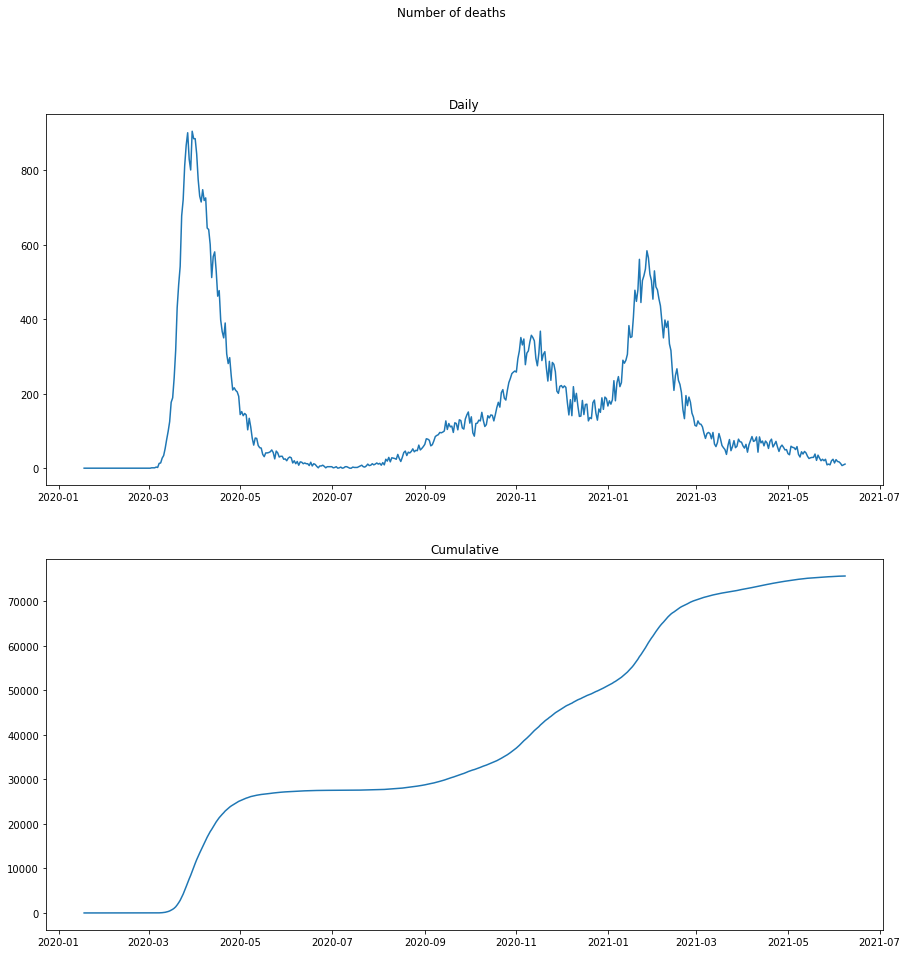

In [36]:
overview(bydate, 'Number of deaths')

## Age:

In [37]:
ages = organise('age_interval')

#### UKNOWN age is not significative. Let's drop this to have a cleaner view

In [38]:
ages = ages.drop('UKNOWN', axis = 0)

In [39]:
ages

,num_infections,num_hosp,num_uci,num_dead,Number of infection (%),Number of hospitalisation (%),Number of Intensive Care Unit (%),Number of deaths (%)
age_interval,,,,,,,,
0-9,259374,2107,134,8,7.0,0.6,0.4,0.0
10-19,414273,2494,166,16,11.2,0.7,0.5,0.0
20-29,484599,8878,456,83,13.1,2.5,1.4,0.1
30-39,511105,18382,1235,209,13.8,5.2,3.7,0.3
40-49,629180,36821,3261,767,17.0,10.5,9.8,1.0
50-59,555323,56071,6950,2814,15.0,15.9,20.9,3.7
60-69,353593,63815,10426,7290,9.5,18.1,31.4,9.6
70-79,233833,69490,8871,16485,6.3,19.7,26.7,21.8
80+,252716,93545,1637,47889,6.8,26.6,4.9,63.3


### Number of infections

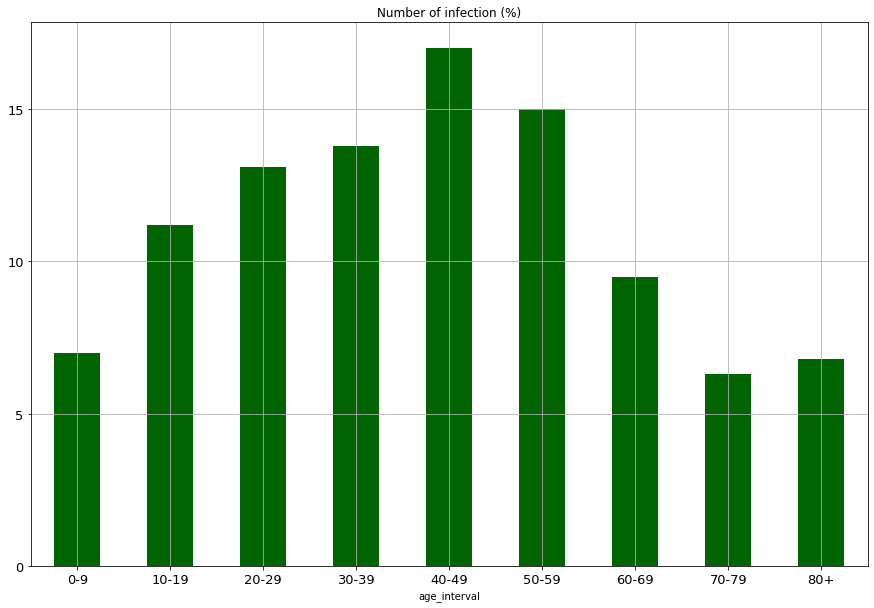

In [40]:
graph_bar('horizontal', ages, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

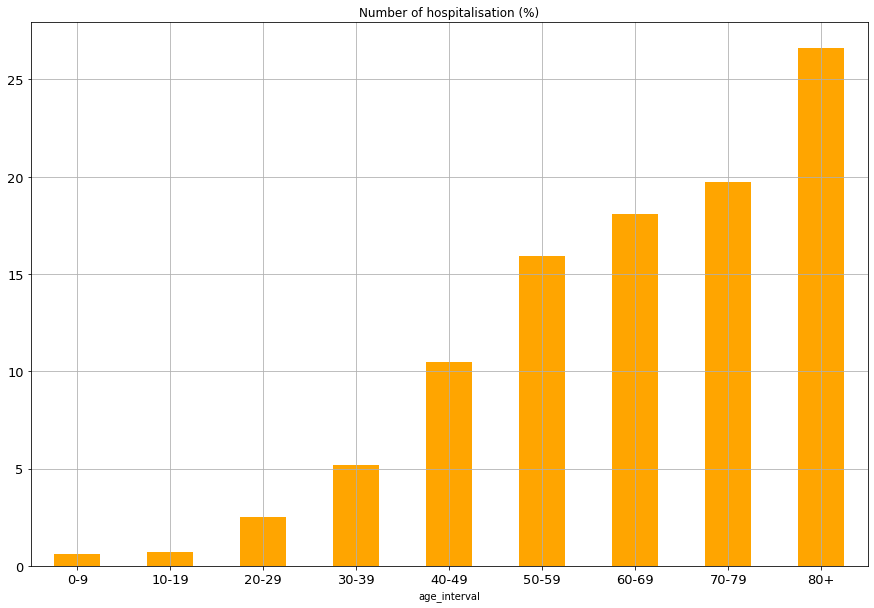

In [41]:
graph_bar('horizontal', ages, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

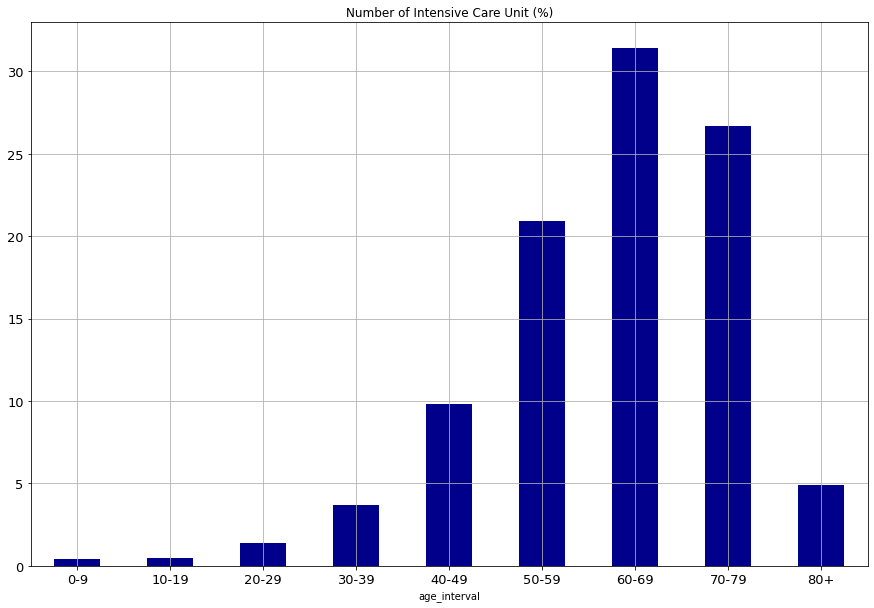

In [42]:
graph_bar('horizontal', ages, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

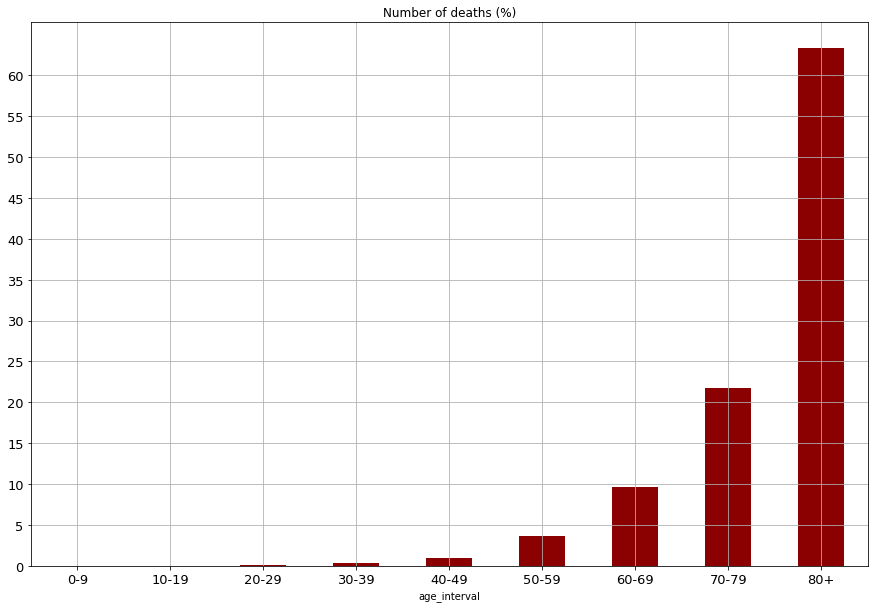

In [43]:
graph_bar('horizontal', ages, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

### Severe cases

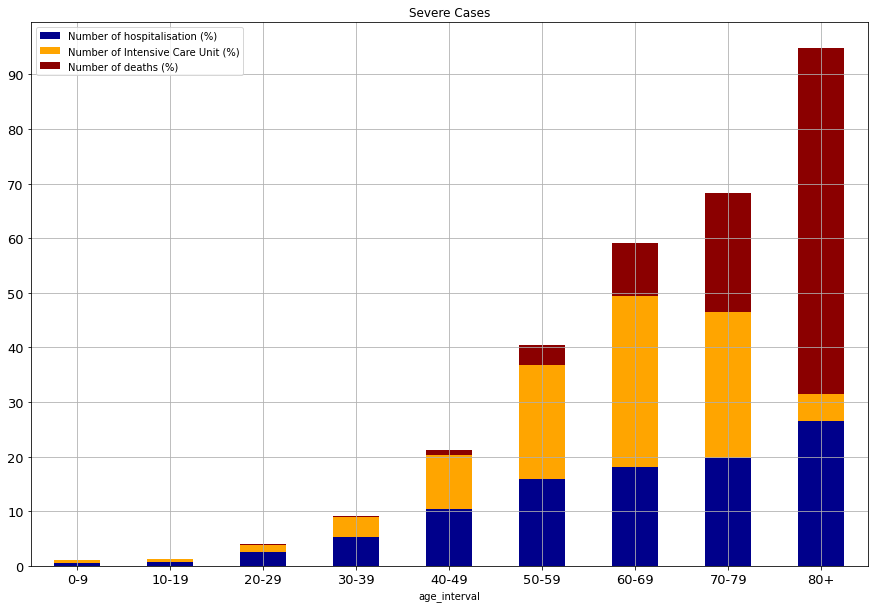

In [44]:
severe_cases(ages)

## Sex:

In [45]:
gender = ages = organise('sex')

In [46]:
gender = gender.drop('UKNOWN', axis = 0)

### Number of infections

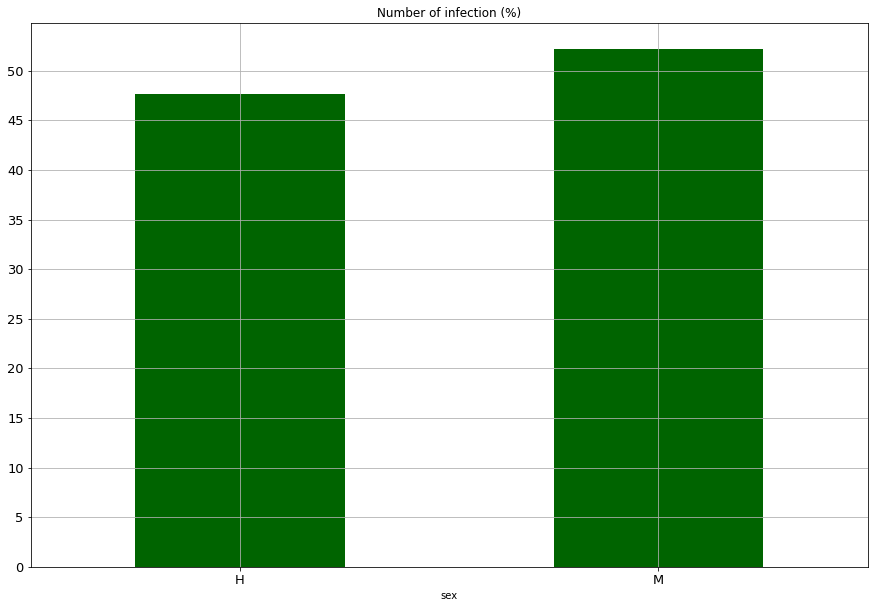

In [47]:
graph_bar('horizontal', gender, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

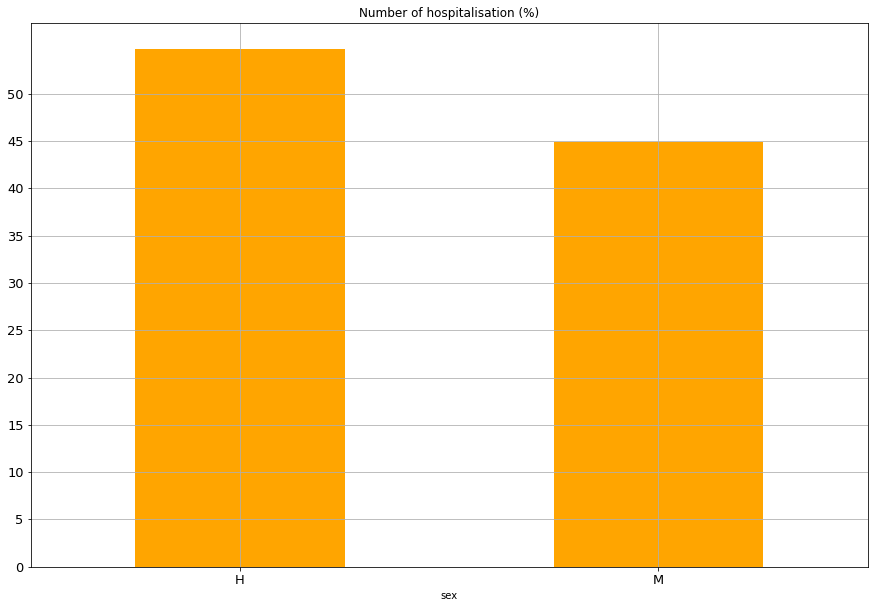

In [48]:
graph_bar('horizontal', gender, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

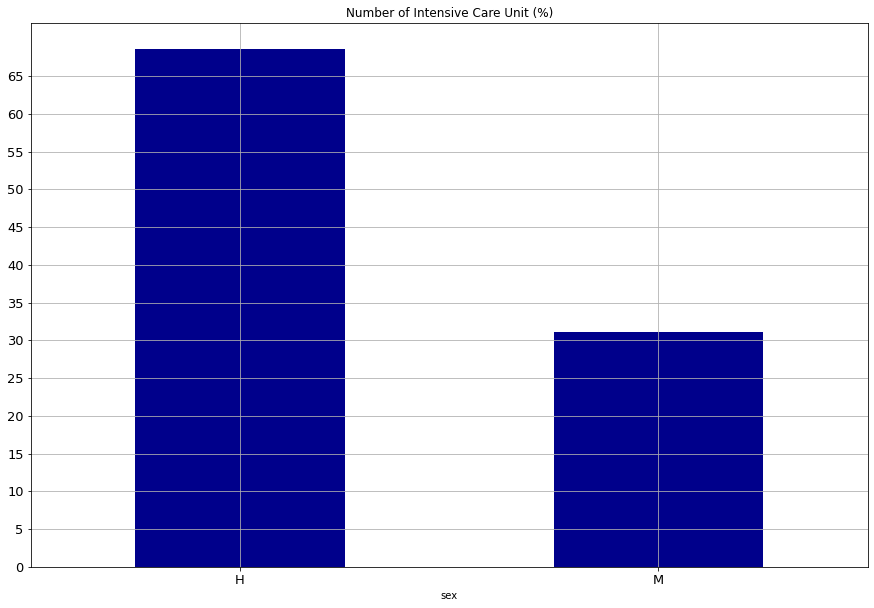

In [49]:
graph_bar('horizontal', gender, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

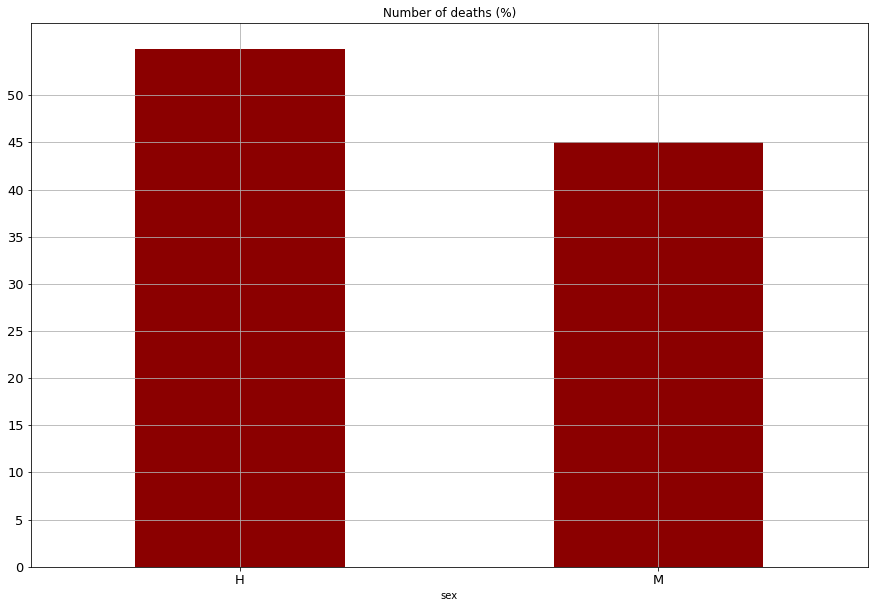

In [50]:
graph_bar('horizontal', gender, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

## Last seven days

In [51]:
last7 = bydate.tail(7)

In [52]:
last7.head()

,date,num_infections,num_hosp,num_uci,num_dead,cumu_num_infections,cumu_num_hosp,cumu_num_uci,cumu_num_dead
471,2021-06-02,5068,218,14,23,3683626,351305,33111,75634
472,2021-06-03,4397,187,24,18,3688023,351492,33135,75652
473,2021-06-04,4381,172,13,17,3692404,351664,33148,75669
474,2021-06-05,2352,132,11,13,3694756,351796,33159,75682
475,2021-06-06,1648,117,8,7,3696404,351913,33167,75689


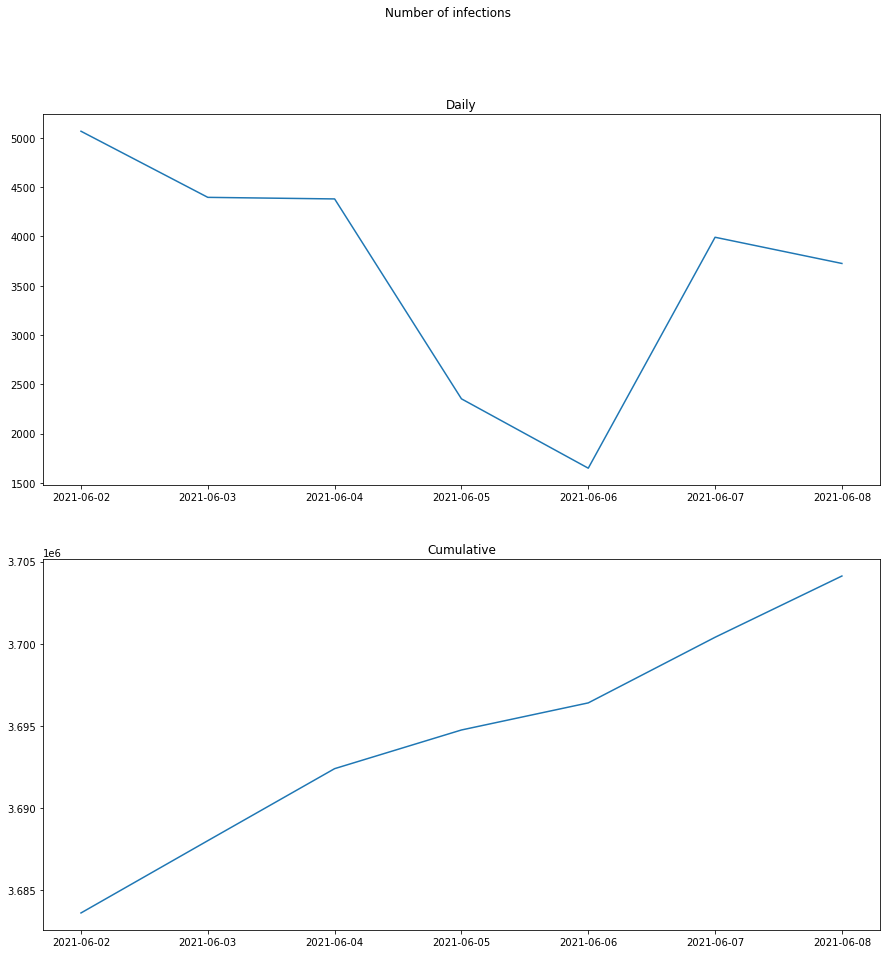

In [53]:
overview(last7, 'Number of infections')

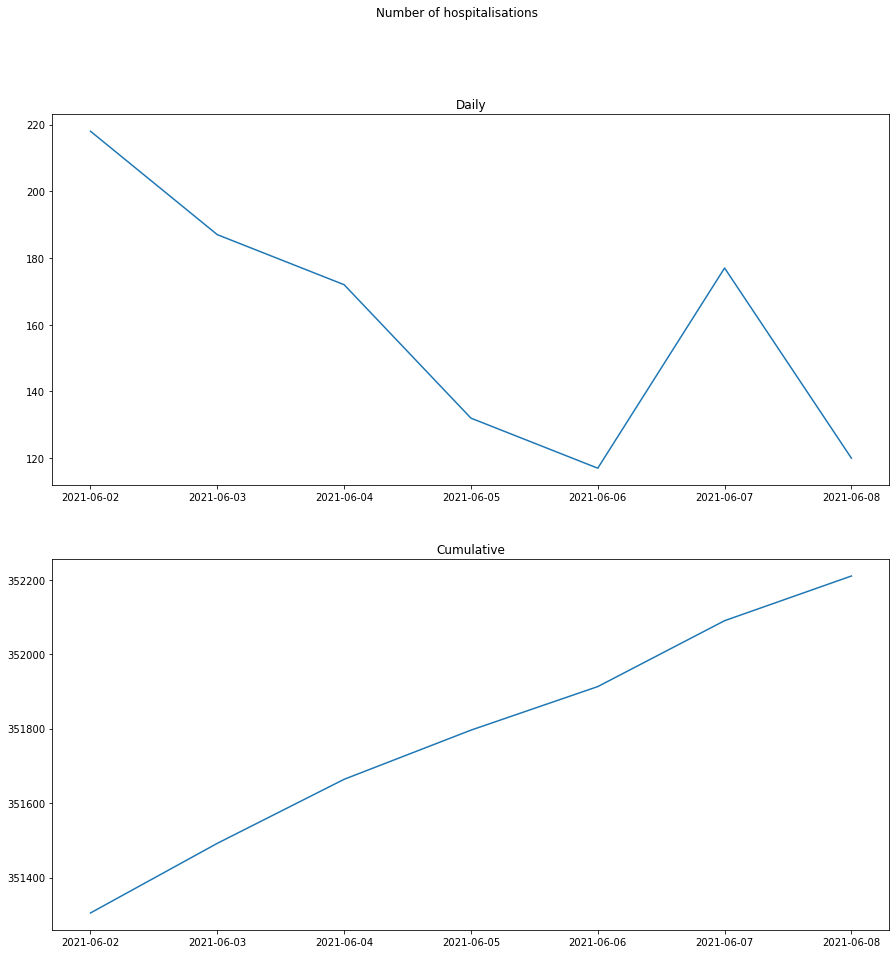

In [54]:
overview(last7, 'Number of hospitalisations')

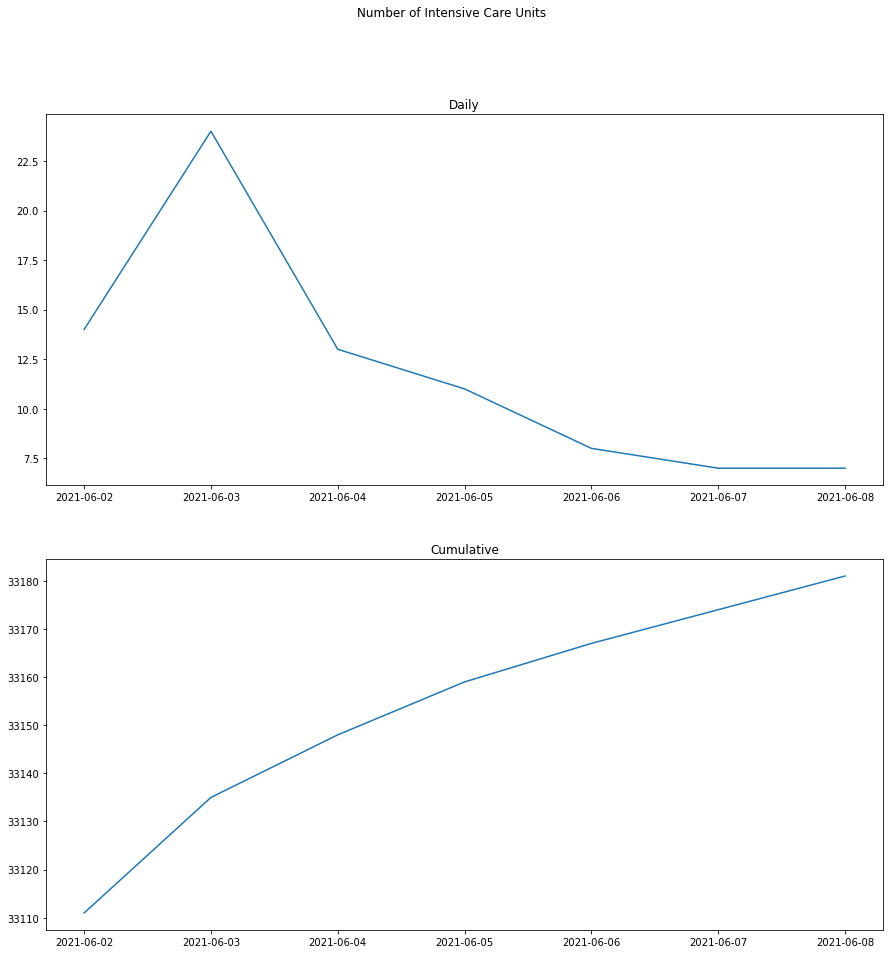

In [55]:
overview(last7, 'Number of Intensive Care Units')

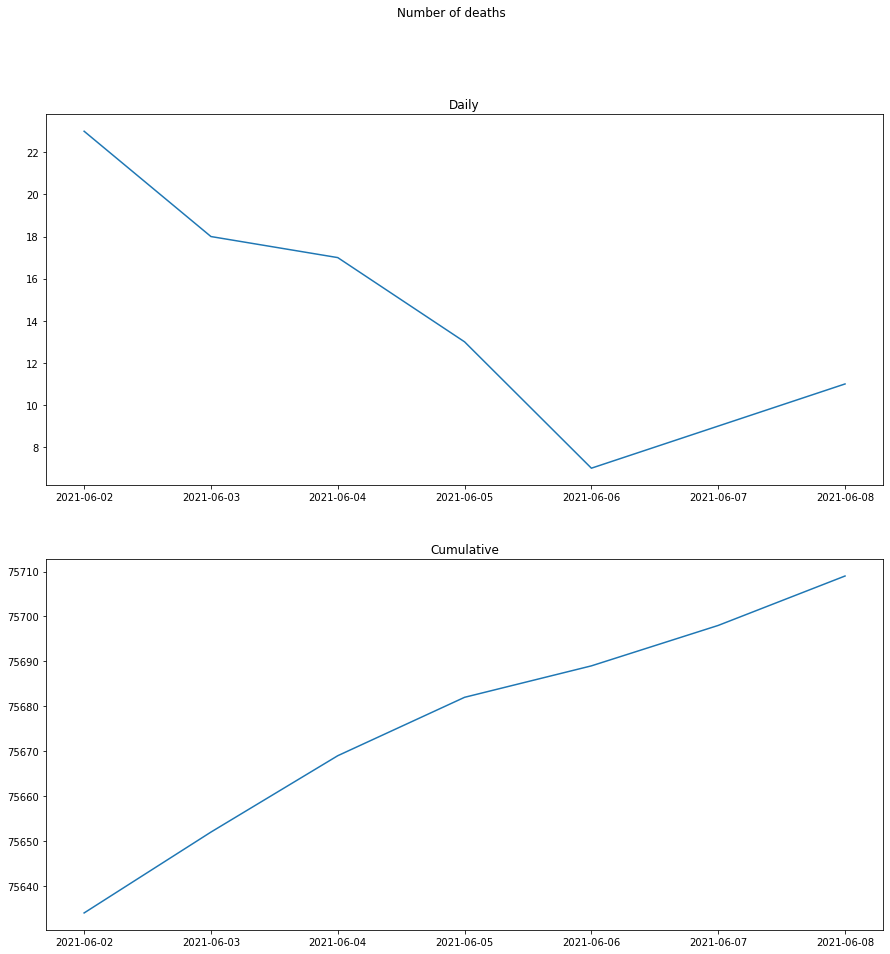

In [56]:
overview(last7, 'Number of deaths')

## Seasonality

In [57]:
import statsmodels.api as sm

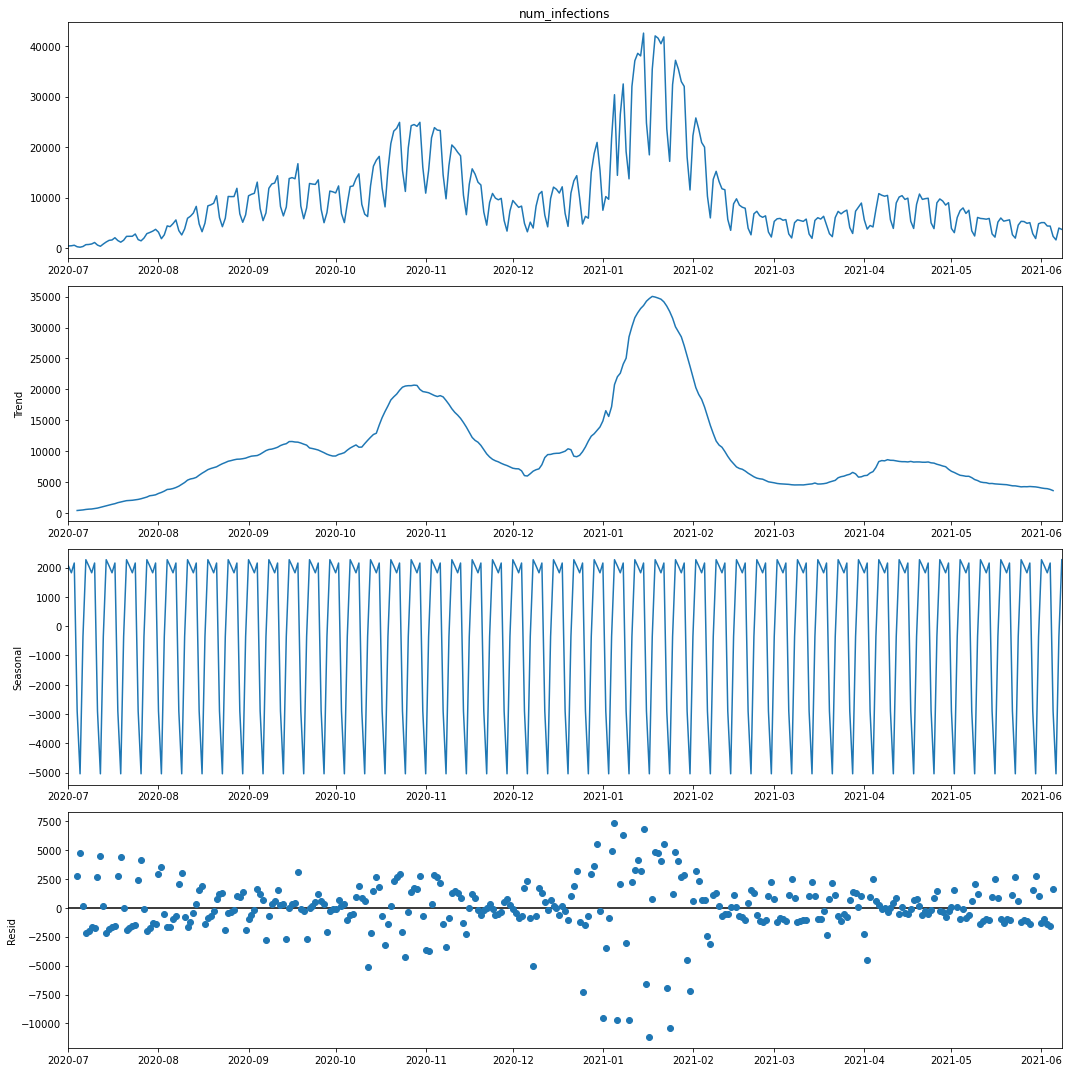

In [58]:
july = bydate[bydate.date >= '2020-07-01'].set_index('date')
july = july.num_infections
res=sm.tsa.seasonal_decompose(july)
resplot=res.plot()

# Autoregression

In [59]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

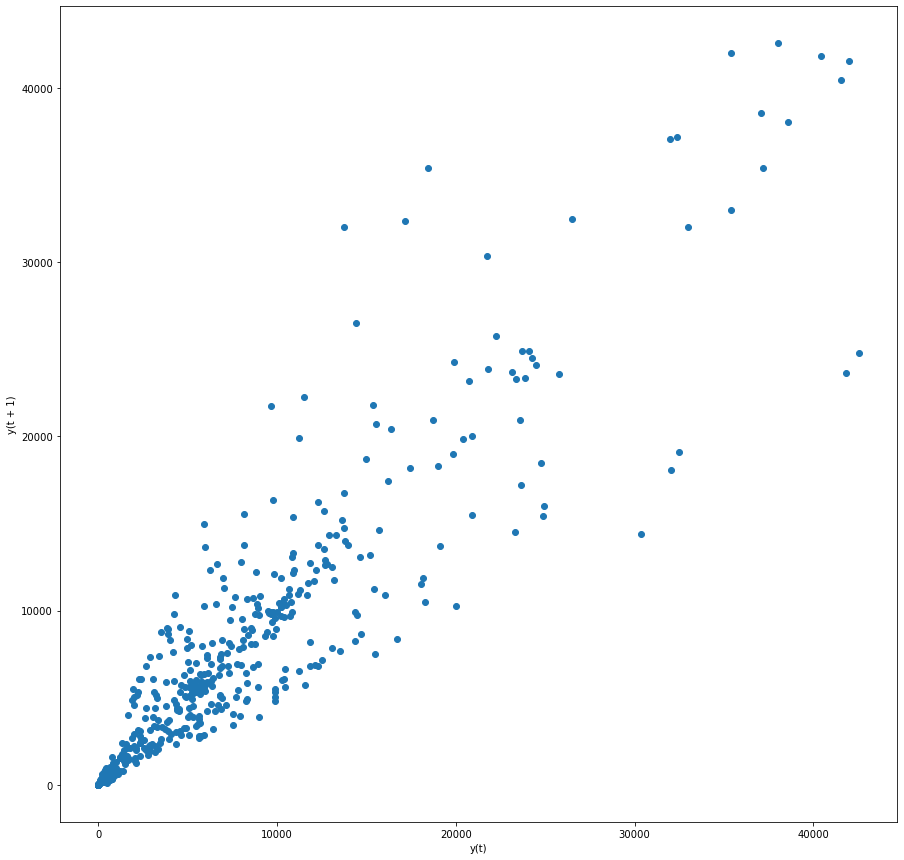

In [60]:
lag_plot(bydate.num_infections)

In [61]:
from statsmodels.tsa.ar_model import AR

In [62]:
from sklearn.model_selection import train_test_split as tts

In [63]:
july = pd.DataFrame(july)

In [66]:
july.head()

,num_infections
date,
2020-07-01,454
2020-07-02,487
2020-07-03,593
2020-07-04,292
2020-07-05,206


In [76]:
train, test = july[:-10], july[-10:]

In [83]:
train

,num_infections
date,
2020-07-01,454
2020-07-02,487
2020-07-03,593
2020-07-04,292
2020-07-05,206
...,...
2021-05-25,5319
2021-05-26,5275
2021-05-27,4929


In [77]:
model = AR(train).fit()

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

In [113]:
pred = model.predict(len(train), len(july.num_infections)-1)

In [114]:
predictions = pd.DataFrame(pred, columns = ['prediction'])

In [115]:
predictions.head()

,prediction
2021-05-30,2400.722253
2021-05-31,4815.628055
2021-06-01,5716.207565
2021-06-02,5675.637114
2021-06-03,5925.815231


In [116]:
compare = pd.concat([test, predictions], axis = 1)

In [117]:
compare['diff'] = abs(compare['num_infections'] - compare['prediction'])

In [118]:
compare

,num_infections,prediction,diff
2021-05-30,1915,2400.722253,485.722253
2021-05-31,4845,4815.628055,29.371945
2021-06-01,5069,5716.207565,647.207565
2021-06-02,5068,5675.637114,607.637114
2021-06-03,4397,5925.815231,1528.815231
2021-06-04,4381,5887.675610,1506.675610
2021-06-05,2352,4186.471651,1834.471651
2021-06-06,1648,3959.645301,2311.645301
2021-06-07,3992,6114.571167,2122.571167
2021-06-08,3726,7067.911005,3341.911005


In [123]:
from sklearn.metrics import mean_squared_error as mse

In [180]:
print('mse error:', mse(test, pred)**0.5, '\nmae error:', compare['diff'].sum()/len(compare))

ValueError: y_true and y_pred have different number of output (3!=1)

In [126]:
compare.num_infections.max(), compare.num_infections.min(), compare.num_infections.mean()

(5069, 1648, 3739.3)

# ARMA

In [217]:
from statsmodels.tsa.arima_model import ARMA

In [218]:
infections = pd.DataFrame(bydate.set_index('date').num_infections, columns = ['num_infections'])

## 10 days

In [219]:
train, test = infections[:-10], infections[-10:]

In [220]:
test

,num_infections
date,
2021-05-30,1915
2021-05-31,4845
2021-06-01,5069
2021-06-02,5068
2021-06-03,4397
2021-06-04,4381
2021-06-05,2352
2021-06-06,1648
2021-06-07,3992


In [221]:
model=ARMA(train, order=(4, 4)).fit(disp=False)

In [161]:
pred=model.predict(len(train), len(infections)-1)

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [167]:
test['predictions'] = list(pred)

<ipython-input-167-79fcfc3c651f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = list(pred)


In [176]:
test['diff'] = abs(test['num_infections'] - test['predictions'])

<ipython-input-176-8b94b3b5db95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['diff'] = abs(test['num_infections'] - test['predictions'])


In [179]:
print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

1084.4990638722163 
error mae: 891.7684426766482


In [177]:
test

,num_infections,predictions,diff
date,,,
2021-05-30,1915,2928.276865,1013.276865
2021-05-31,4845,4731.660211,113.339789
2021-06-01,5069,5499.328273,430.328273
2021-06-02,5068,5797.920306,729.920306
2021-06-03,4397,5122.916762,725.916762
2021-06-04,4381,4177.464672,203.535328
2021-06-05,2352,3602.797314,1250.797314
2021-06-06,1648,3803.725729,2155.725729
2021-06-07,3992,4595.980930,603.980930


## 5 days

In [181]:
train, test = infections[:-5], infections[-5:]

In [182]:
model=ARMA(train, order=(4, 4)).fit(disp=False)
pred=model.predict(len(train), len(infections)-1)
test['predictions'] = list(pred)
test['diff'] = abs(test['num_infections'] - test['predictions'])

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no as

In [183]:
print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

956.2995983045588 
error mae: 847.8551246211231


## 3 days

In [184]:
train, test = infections[:-3], infections[-3:]

In [185]:
model=ARMA(train, order=(4, 4)).fit(disp=False)
pred=model.predict(len(train), len(infections)-1)
test['predictions'] = list(pred)
test['diff'] = abs(test['num_infections'] - test['predictions'])

/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ffreire/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no as

In [186]:
print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

1471.1129015411393 
error mae: 1029.4705873324863


,num_infections,predictions,diff
date,,,
2021-06-06,1648,2136.806132,488.806132
2021-06-07,3992,3891.074443,100.925557
2021-06-08,3726,6224.680072,2498.680072


In [189]:
len(infections)

478

In [193]:
infections[-2:]

,num_infections
date,
2021-06-07,3992
2021-06-08,3726


In [199]:
import warnings
warnings.simplefilter('ignore')

res= []
for i in range(1, 20):
    train, test = infections[:-i], infections[-i:]
    model=ARMA(train, order=(4, 4)).fit(disp=False)
    pred=model.predict(len(train), len(infections)-1)
    test['predictions'] = list(pred)
    test['diff'] = abs(test['num_infections'] - test['predictions'])
    res.append((i, mse(test['num_infections'], pred)**0.5))
    print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

1273.0819815546301 
error mae: 1273.0819815546301
1785.347700688634 
error mae: 1468.7544353486462
1471.1129015411393 
error mae: 1029.4705873324863
1291.1794266707543 
error mae: 1118.4815829131494
956.2995983045588 
error mae: 847.8551246211231
915.8893792064354 
error mae: 777.5944914535138
838.879690492481 
error mae: 663.3972202789926
1180.9189143738427 
error mae: 1045.8073519489515
844.9924255208487 
error mae: 726.6853595885797
1084.4990638722163 
error mae: 891.7684426766482
1626.8905823470345 
error mae: 1424.3125951867632
1281.2525212132664 
error mae: 1027.7566512744404
1202.320491324338 
error mae: 919.1863054935367
1121.0912291312845 
error mae: 833.4870566933935
1073.619354854376 
error mae: 776.9218539950328
910.3669057750177 
error mae: 728.6428485856061
1047.088538051406 
error mae: 782.6978034280681
1838.0023690296712 
error mae: 1440.0095470000933
1734.6740667611916 
error mae: 1312.150037654813


In [200]:
res

[(1, 1273.0819815546301),
 (2, 1785.347700688634),
 (3, 1471.1129015411393),
 (4, 1291.1794266707543),
 (5, 956.2995983045588),
 (6, 915.8893792064354),
 (7, 838.879690492481),
 (8, 1180.9189143738427),
 (9, 844.9924255208487),
 (10, 1084.4990638722163),
 (11, 1626.8905823470345),
 (12, 1281.2525212132664),
 (13, 1202.320491324338),
 (14, 1121.0912291312845),
 (15, 1073.619354854376),
 (16, 910.3669057750177),
 (17, 1047.088538051406),
 (18, 1838.0023690296712),
 (19, 1734.6740667611916)]

In [202]:
import warnings
warnings.simplefilter('ignore')

res= []
for i in range(1, 20):
    train, test = infections[:-i], infections[-i:]
    model=ARMA(train, order=(5, 5)).fit(disp=False)
    pred=model.predict(len(train), len(infections)-1)
    test['predictions'] = list(pred)
    test['diff'] = abs(test['num_infections'] - test['predictions'])
    res.append((i, mse(test['num_infections'], pred)**0.5))
    print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

1313.5822950176116 
error mae: 1313.5822950176116
885.9340045884018 
error mae: 727.5344209409707
554.0456083243274 
error mae: 425.75938559105566
814.8563461674579 
error mae: 672.5191585310855
728.0125592441124 
error mae: 538.661668364947
1014.4579099350863 
error mae: 932.8336890303302
714.4211855937133 
error mae: 651.3431697556072
1077.642395197006 
error mae: 928.5977439902957
808.4708836656495 
error mae: 676.6582256580023
977.0041138292133 
error mae: 815.1704532008752
1070.1372348524542 
error mae: 899.1851415100452
913.1551515064772 
error mae: 727.9943004211433
1051.847337883255 
error mae: 870.052112462233
769.7149277375652 
error mae: 629.9952296914779
747.9291046675362 
error mae: 591.1974268361618
722.3075939770343 
error mae: 553.5963550678066
848.6265330167706 
error mae: 664.5729281893213
1300.8183865778913 
error mae: 1107.8032076226416
1389.9339054629281 
error mae: 1186.60495714601


In [ ]:
res = []
for i in range(1, 20):
    for j in range(1,10): 
        for k in range(1,7):
            model=ARMA(train, order=(j, k)).fit(disp=False)
            pred=model.predict(len(train), len(infections)-1)
            test['predictions'] = list(pred)
            test['diff'] = abs(test['num_infections'] - test['predictions'])
            res.append(((i, j, k), mse(test['num_infections'], pred)**0.5))
            #print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

In [255]:
res

[((1, 1, 1), 2523.908772596996),
 ((1, 1, 2), 1267.61025374804),
 ((1, 1, 3), 1273.291838480706),
 ((1, 1, 4), 1248.9272410488325),
 ((1, 1, 5), 1290.3900827898124),
 ((1, 1, 6), 1251.510880511838),
 ((1, 2, 1), 1441.3471771834681),
 ((1, 2, 2), 1272.6170130167166),
 ((1, 2, 3), 1269.1776781666217),
 ((1, 2, 4), 1332.3584552826374),
 ((1, 2, 5), 1260.2726761721194),
 ((1, 2, 6), 998.5619154081772),
 ((1, 3, 1), 1205.792931027307),
 ((1, 3, 2), 1238.0804916813513),
 ((1, 3, 3), 1023.4969645350033),
 ((1, 3, 4), 1201.7342045765638),
 ((1, 3, 5), 949.6477998111932),
 ((1, 3, 6), 915.5876711896914),
 ((1, 4, 1), 1255.3606834989187),
 ((1, 4, 2), 1215.3406861821888),
 ((1, 4, 3), 957.8024300929393),
 ((1, 4, 4), 1084.4990638722163),
 ((1, 4, 5), 924.7253307030056),
 ((1, 4, 6), 916.1571893336766),
 ((1, 5, 1), 1008.8284801967517),
 ((1, 5, 2), 845.7689785781355),
 ((1, 5, 3), 846.9100811999007),
 ((1, 5, 4), 953.2430666180902),
 ((1, 5, 5), 977.0041138292133),
 ((1, 5, 6), 1106.586730382494

,num_infections
date,
2020-01-18,1
2020-01-31,1
2020-02-09,1
2020-02-12,3
2020-02-21,1
...,...
2021-05-25,5319
2021-05-26,5275
2021-05-27,4929


In [ ]:
import warnings
warnings.simplefilter('ignore')

res= []
for i in range(1, 20):
    train, test = infections[:-i], infections[-i:]
    model=ARMA(train, order=(6, 6)).fit(disp=False) #primeiro auto regressão 6 passos atrás que vê (quantas betas)
                                                    # quantos elementos tem a média móvel
    pred=model.predict(len(train), len(infections)-1)
    test['predictions'] = list(pred)
    test['diff'] = abs(test['num_infections'] - test['predictions'])
    res.append((i, mse(test['num_infections'], pred)**0.5))
    print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

In [216]:
def grid(model, param, cv=5):
    grid=GridSearchCV(model, param, cv=cv, 
                      iid=True, return_train_score=True, n_jobs=-1)
    
    grid.fit(X_train, y_train)
    
    print('Acierto test: {:.2f}'.format(grid.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(grid.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(grid.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(grid.best_score_))
    
    return grid.best_estimator_.fit(X_train, y_train)

In [207]:
test.num_infections.max(), test.num_infections.mean(), test.num_infections.min()

(5617, 3984.8947368421054, 1648)

## ARIMA

In [209]:
from statsmodels.tsa.arima_model import ARIMA

In [210]:
res= []
for i in range(1, 20):
    train, test = infections[:-i], infections[-i:]
    model=ARIMA(train, order=(4, 1, 2)).fit(disp=False)
    pred=model.predict(len(train), len(infections)-1)
    test['predictions'] = list(pred)
    test['diff'] = abs(test['num_infections'] - test['predictions'])
    res.append((i, mse(test['num_infections'], pred)**0.5))
    print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

2609.47086235164 
error mae: 2609.47086235164
2182.065851964781 
error mae: 2180.350410538179
2317.101826120351 
error mae: 2298.0830590667497
2770.030290701221 
error mae: 2730.2488807356353
3341.3182848404103 
error mae: 3137.3627910936493
3639.757925013451 
error mae: 3420.7479424310227
3906.7815308992517 
error mae: 3678.404412681556
3944.78373582907 
error mae: 3741.9528128234783
3761.22027550622 
error mae: 3611.143375944633
3680.201680326215 
error mae: 3523.6823217662386
3773.360138354569 
error mae: 3641.35647528409
3977.6814484884835 
error mae: 3774.9510690878847
4073.239249712889 
error mae: 3875.043945163107
4175.88312631175 
error mae: 3979.608512765556
4187.997956076355 
error mae: 4003.6965305605163
4081.476485302223 
error mae: 3885.8445791881013
4013.7146849826704 
error mae: 3807.3081847519784
4057.909335908406 
error mae: 3888.570220537529
4209.00391314735 
error mae: 3986.3390777158716


In [214]:
res= []
for i in range(1, 20):
    train, test = infections[:-i], infections[-i:]
    model=ARIMA(train, order=(4, 1, 6)).fit(disp=False)
    pred=model.predict(len(train), len(infections)-1)
    test['predictions'] = list(pred)
    test['diff'] = abs(test['num_infections'] - test['predictions'])
    res.append((i, mse(test['num_infections'], pred)**0.5))
    print(mse(test['num_infections'], pred)**0.5, '\nerror mae:', test['diff'].sum()/len(test))

2902.364290373186 
error mae: 2902.364290373186
2448.070774114977 
error mae: 2426.172301358417
2574.0986253125325 
error mae: 2513.6982558785216
3036.207095878399 
error mae: 2919.701866384983
3354.710991556973 
error mae: 3222.9967573054464
3583.1157129960256 
error mae: 3422.8319090521613
3853.911266047113 
error mae: 3672.751979293468
3900.37632765744 
error mae: 3699.8538545646124
3738.7154119822794 
error mae: 3558.9764684811025
3644.9001829403433 
error mae: 3468.3492355745766
3806.3771216189734 
error mae: 3615.8742651307202
3954.85301153104 
error mae: 3744.360366638421
4060.762342265621 
error mae: 3852.8640974995787
4218.2947517568 
error mae: 3999.217899077994
4239.814532110528 
error mae: 4031.985771908958
4136.400435367538 
error mae: 3902.381833477577
4064.62611342961 
error mae: 3811.235712850836
4070.9606670866724 
error mae: 3886.1751235899046
4138.741987608844 
error mae: 3963.9186677708312
